In [14]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv('miniLab.csv') # read in the csv file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 6 columns):
sttl                82332 non-null int64
ct_dst_sport_ltm    82332 non-null int64
ct_src_dport_ltm    82332 non-null int64
swin                82332 non-null int64
dwin                82332 non-null int64
label               82332 non-null int64
dtypes: int64(6)
memory usage: 3.8 MB


In [15]:
# NOTE: calling describe when not all the data is categorical will cause the 
# categorical variables to be removed
df[['label','sttl']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,82332.0,0.550600,0.497436,0.0,0.0,1.0,1.0,1.0
sttl,82332.0,180.967667,101.513358,0.0,62.0,254.0,254.0,255.0


In [16]:
# NOTE: calling describe when not all the data is categorical will cause the 
# categorical variables to be removed
df[['label','ct_dst_sport_ltm']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,82332.0,0.550600,0.497436,0.0,0.0,1.0,1.0,1.0
ct_dst_sport_ltm,82332.0,3.663011,5.915386,1.0,1.0,1.0,3.0,38.0


In [17]:
df[['label','ct_src_dport_ltm']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,82332.0,0.550600,0.497436,0.0,0.0,1.0,1.0,1.0
ct_src_dport_ltm,82332.0,4.928898,8.389545,1.0,1.0,1.0,4.0,59.0


In [18]:
df[['label','swin']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,82332.0,0.55060,0.497436,0.0,0.0,1.0,1.0,1.0
swin,82332.0,133.45908,127.357000,0.0,0.0,255.0,255.0,255.0


In [19]:
df[['label','dwin']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,82332.0,0.55060,0.497436,0.0,0.0,1.0,1.0,1.0
dwin,82332.0,128.28662,127.491370,0.0,0.0,255.0,255.0,255.0


In [20]:
from sklearn.cross_validation import ShuffleSplit

# we want to predict the X and y data as follows:
if 'label' in df:
    y = df['label'].values # get the labels we want
    del df['label'] # get rid of the class label
    X = df.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(82332, n_iter=3, test_size=0.2, random_state=None)


In [21]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.766806339953
confusion matrix
 [[4888 2498]
 [1342 7739]]
====Iteration 1  ====
accuracy 0.767292160078
confusion matrix
 [[4960 2490]
 [1342 7675]]
====Iteration 2  ====
accuracy 0.76419505678
confusion matrix
 [[4860 2505]
 [1378 7724]]


In [22]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.767595797656
confusion matrix
 [[4969 2498]
 [1329 7671]]
====Iteration 1  ====
accuracy 0.768810347969
confusion matrix
 [[4959 2446]
 [1361 7701]]
====Iteration 2  ====
accuracy 0.767352887593
confusion matrix
 [[4884 2513]
 [1318 7752]]


In [23]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.76267687  0.76747434  0.76589543]


In [24]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.76838526  0.76121941  0.76911399]


<function __main__.lr_explor>

In [26]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sttl has weight of 0.0080323486967
ct_dst_sport_ltm has weight of 1.32480623373
ct_src_dport_ltm has weight of -0.212352534678
swin has weight of -0.026754227668
dwin has weight of 0.0258834959026


In [28]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


accuracy: 0.764255784296
[[4850 2515]
 [1367 7735]]
sttl has weight of 0.823093393799
ct_src_dport_ltm has weight of -1.38813676716
dwin has weight of 1.97811317554
swin has weight of -2.1366175104
ct_dst_sport_ltm has weight of 5.99660826688


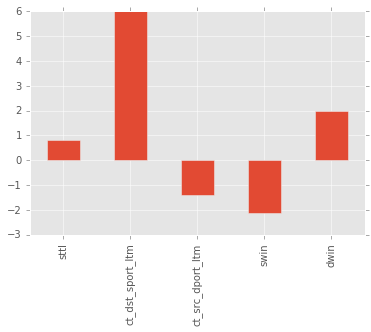

In [30]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was conv

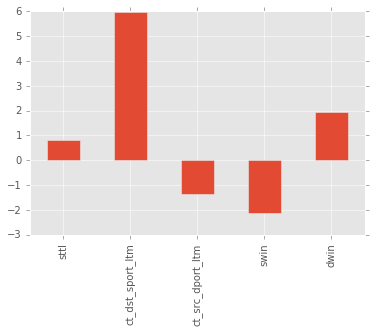

In [31]:
# you can also apply the StandardScaler function insied of the validation loop 
#  but this requires the use of PipeLines in scikit. Here is an example, but we will go over more 
#  thorough examples later in class

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])

# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    
# it is a little odd getting trained objects from a  pipeline:
trained_model_from_pipeline = piped_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

In [33]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dwaraka\Anaconda\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
